### LAB 1 : Big Data In Media Technology 
#### Sentiment Classification with Support Vector Machines

This lab aims to understand SVM classification technique, get familiar with handly such a type of data, do data cleaning and data analysis, learn to employ python to do analysis.  

### Plan :
    1. Data Exploration 
    2. Data Processing using NLTK 
    3. Bag of Words & TF-IDF models 
    4. Train and test the model 

### 1. Data Exploration 

#### 1.1 import python useful packages 

In [1]:
!pip install nltk

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sys
import numpy as np
import pandas as pd 
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings


plt.rcParams['figure.figsize'] = (12,4)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#### 1.2 import data from csv to dataframe

In [3]:
''' Function _ csv_pd : @input : String = filename => CSV file name
                        @ouput : dataFrame 
'''              
def csv_pd(filename) :
    out = pd.read_csv(filename,engine="python",sep=",")
    return out 

In [4]:
train_data = csv_pd("train.csv")
train_data.head(5)

,score,text
0,0,"overgeneralized, not helpful to anyone serious..."
1,1,Great sound and service.
2,1,love this book!!!: this book is a fast read ab...
3,1,A hugely enjoyable screen version of Rona Jaff...
4,0,What an uninteresting hodge-podge. It could ha...


In [5]:
## Verify that scores can be 0 or 1, Binary Classification
train_data.score.unique()

array([0, 1])

### 2.Processing Data using NLTK

In [6]:
# Handling Missing Values : 
def fillna(df) :
    show = df.count() - df.isna().count()
    print("Here's the count list of missing values {}".format(show.to_frame()))
    values = {"score": 0, "text": "Negative"}
    df.fillna(value=values)

In [7]:
fillna(train_data)

Here's the count list of missing values        0
score  0
text   0


In [10]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
# Remove puntuations from text 
import string
import re

def remove_puncts(text) :
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub("\d+", "", text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = re.sub(emoji_pattern, '', text)
    return text 

def tokenize(text) :
    text = text.split()
    return text

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
def remove_stop_words(tokenize_text) :
    tokenize_text = [w.lower() for w in tokenize_text if not w.lower() in stop_words]
    return tokenize_text

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmating(tokenize_text):
    tokenize_text = [wn.lemmatize(word) for word in tokenize_text]
    return tokenize_text

ps = nltk.PorterStemmer()
ls = nltk.LancasterStemmer()

def stemming(tokenize_text):
    tokenize_text = [ps.stem(word) for word in tokenize_text]
    tokenize_text = [ls.stem(word) for word in tokenize_text]
    return tokenize_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /mnt/workspace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /mnt/workspace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
def apply_processing(df):
    df["without puncts"] =df["text"].apply(lambda x: remove_puncts(x))
    df["tokenize text"] = df["without puncts"].apply(lambda x: tokenize(x))
    df["without stop words"] = df["tokenize text"].apply(lambda x: remove_stop_words(x))
    df["lemmatized"] = df["without stop words"].apply(lambda x: lemmating(x))
    df["stemming"] = df["lemmatized"].apply(lambda x:stemming(x))
    df["processed"] = df["stemming"].apply(lambda x: ' '.join(str(e) for e in x))
    return df
    
train_processed = apply_processing(train_data)

In [12]:
train_processed.head(5)

,score,text,without puncts,tokenize text,without stop words,lemmatized,stemming,processed
0,0,"overgeneralized, not helpful to anyone serious...",overgeneralized not helpful to anyone seriousl...,"[overgeneralized, not, helpful, to, anyone, se...","[overgeneralized, helpful, anyone, seriously, ...","[overgeneralized, helpful, anyone, seriously, ...","[overg, help, anyon, sery, appl, prem, know, n...",overg help anyon sery appl prem know noth mean...
1,1,Great sound and service.,Great sound and service,"[Great, sound, and, service]","[great, sound, service]","[great, sound, service]","[gre, sound, serv]",gre sound serv
2,1,love this book!!!: this book is a fast read ab...,love this book this book is a fast read about ...,"[love, this, book, this, book, is, a, fast, re...","[love, book, book, fast, read, poor, young, fa...","[love, book, book, fast, read, poor, young, fa...","[lov, book, book, fast, read, poor, young, far...",lov book book fast read poor young farm boy gr...
3,1,A hugely enjoyable screen version of Rona Jaff...,A hugely enjoyable screen version of Rona Jaff...,"[A, hugely, enjoyable, screen, version, of, Ro...","[hugely, enjoyable, screen, version, rona, jaf...","[hugely, enjoyable, screen, version, rona, jaf...","[hug, enjoy, screen, vert, ron, jaff, bestsel,...",hug enjoy screen vert ron jaff bestsel potboil...
4,0,What an uninteresting hodge-podge. It could ha...,What an uninteresting hodgepodge It could have...,"[What, an, uninteresting, hodgepodge, It, coul...","[uninteresting, hodgepodge, could, something, ...","[uninteresting, hodgepodge, could, something, ...","[uninterest, hodgepodg, could, some, imagin, s...",uninterest hodgepodg could some imagin seem go...


### 3. Bag_of_Words and TF-IFD 

#### 3.1 Bag of Words Model 
A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:
    - A vocabulary of known words.
    
    - A measure of the presence of known words.

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

countV = CountVectorizer(lowercase=False, ngram_range=(1,2)) # Bag Of Words
train_countV = countV.fit_transform(train_processed.processed) # Fit the dictionnary

In [66]:
## A random set of words in our vocabulary
np.random.choice(countV.get_feature_names(), 50, replace=False)

array(['lall', 'wit green', 'direct com', 'gre reread', 'fli carpet',
       'team rebel', 'see us', 'deep any', 'left sad', 'reawak', 'dignit',
       'firstl act', 'explicit enough', 'morn giv', 'fac virgin',
       'garb okay', 'thu ens', 'would dang', 'journey nev', 'writ', 'mah',
       'ryan lik', 'fut rul', 'lowr', 'short deirdr', 'prett suppo',
       'view vot', 'amaz jetblu', 'punt piledr', 'understand neophyt',
       'afr cost', 'nichol cag', 'rang stil', 'lawr kind', 'phon deserv',
       'viol frust', 'wif lik', 'plea rest', 'realopt', 'could termin',
       'br hug', 'int stor', 'altoge cre', 'song also', 'chant jan',
       'last far', 'built nic', 'popcorn found', 'almost hug',
       'kidnap stol'], dtype='<U64')

#### 3.2 TF-IDF Model 

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer(lowercase=False, ngram_range=(1,3))
train_tfidf = tfidfV.fit_transform(train_processed.processed)

### 4. Train and Test The models 

In [68]:
## Import Datas Test and Evaluation
test_data = csv_pd("test.csv")
evaluation_data = csv_pd("evaluation.csv")

## Process Datas Test and Evaluation 
test_processed = apply_processing(test_data)
evaluation_processed = apply_processing(evaluation_data)

#### 4.1 Choose NLP Model (BoW or TF-IDF) wrt Different SVM's Classifiers

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import svm

def test_model_BoW(train_df,test_df,y,y_test,models,names) :
    L,S = [[] for i in range(len(names))],[[] for i in range(len(names))]
    for i in range(len(models)):
        model_bow = Pipeline([('countV_bayes',countV),('bayes_classifier',models[i])])
        model_bow.fit(train_df,y)
        y_pred_train = model_bow.predict(train_df)
        y_pred_test = model_bow.predict(test_df)
        accuracy_train = np.mean(y_pred_train == y)
        accuracy_test = np.mean(y_pred_test == y_test)
        f1_train = f1_score(y_pred_train,y, average='macro')
        f1_test = f1_score(y_pred_test,y_test, average='macro')
        L[i].append(accuracy_train)
        S[i].append(accuracy_test)
        L[i].append(f1_train)
        S[i].append(f1_test)
        print('\n\n\n')
        print("#################Start Train and Test BoW with {}#################".format(names[i]))
        print("For training score Using BoW We reached {} as accuracy".format(accuracy_train))
        print("For testing score Using BoW We reached {} as accuracy".format(accuracy_test))
        print("For training score Using BoW We reached {} as f1-score".format(f1_train))
        print("For testing score Using BoW We reached {} as f1-score".format(f1_test))
        print("##################End Train and Test BoW with {}##################".format(names[i]))
        print('\n\n\n')
    
    return L,S
    
    
def test_model_TFIDF(train_df,test_df,y,y_test,models,names) : 
    L,S = [[] for i in range(len(names))],[[] for i in range(len(names))]
    for i in range(len(models)):
        model_TFIDF = Pipeline([('tfidfv_bayes',tfidfV),('bayes_classifier',models[i])])
        model_TFIDF.fit(train_df,y)
        y_pred_train = model_TFIDF.predict(train_df)
        y_pred_test = model_TFIDF.predict(test_df)
        accuracy_train = np.mean(y_pred_train == y)
        accuracy_test = np.mean(y_pred_test == y_test)
        f1_train = f1_score(y_pred_train,y,average='macro')
        f1_test = f1_score(y_pred_test,y_test,average='macro')
        L[i].append(accuracy_train)
        S[i].append(accuracy_test)
        L[i].append(f1_train)
        S[i].append(f1_test)
        print('\n\n\n')
        print("#################Start Train and Test TF-IDF with {}#################".format(names[i]))
        print("For training score Using TFIDF We reached {} as accuracy".format(accuracy_train))
        print("For testing score Using TFIDF We reached {} as accuracy".format(accuracy_test))
        print("For training score Using TFIDF We reached {} as f1-score".format(f1_train))
        print("For testing score Using TFIDF We reached {} as f1-score".format(f1_test))
        print("#################End Train and Test TF-IDF with {}###################".format(names[i]))
        print('\n\n\n')
    
    return L,S

In [88]:
## Models :
C = 1.0  # SVM regularization parameter

svc = svm.SVC(kernel='linear', C=C)
svclinear = svm.LinearSVC(C=C, max_iter=10000)
svcrbf = svm.SVC(kernel='rbf', gamma=0.7, C=C)

models = [svc,svclinear,svcrbf]
names = ["SVM", "Linear SVM", "SVM with RBF Kernel"]

In [89]:
bowtrain, bowtest = test_model_BoW(
                  train_processed.processed,
                  test_processed.processed,
                  train_processed.score,
                  test_processed.score,
                  models,
                  names
                )





#################Start Train and Test BoW with SVM#################
For training score Using BoW We reached 0.9994666666666666 as accuracy
For testing score Using BoW We reached 0.8136 as accuracy
For training score Using BoW We reached 0.999466666514963 as f1-score
For testing score Using BoW We reached 0.8135655170780387 as f1-score
##################End Train and Test BoW with SVM##################








#################Start Train and Test BoW with Linear SVM#################
For training score Using BoW We reached 0.9994666666666666 as accuracy
For testing score Using BoW We reached 0.8168 as accuracy
For training score Using BoW We reached 0.999466666514963 as f1-score
For testing score Using BoW We reached 0.8167324402467726 as f1-score
##################End Train and Test BoW with Linear SVM##################








#################Start Train and Test BoW with SVM with RBF Kernel#################
For training score Using BoW We reached 0.9994666666666666 as accuracy
F

In [90]:
tftrain, tftest = test_model_TFIDF(
                  train_processed.processed,
                  test_processed.processed,
                  train_processed.score,
                  test_processed.score,
                  models,
                  names
                )





#################Start Train and Test TF-IDF with SVM#################
For training score Using TFIDF We reached 0.998 as accuracy
For testing score Using TFIDF We reached 0.8432 as accuracy
For training score Using TFIDF We reached 0.9979999982577763 as f1-score
For testing score Using TFIDF We reached 0.8431995985909724 as f1-score
#################End Train and Test TF-IDF with SVM###################








#################Start Train and Test TF-IDF with Linear SVM#################
For training score Using TFIDF We reached 0.9994666666666666 as accuracy
For testing score Using TFIDF We reached 0.8476 as accuracy
For training score Using TFIDF We reached 0.999466666514963 as f1-score
For testing score Using TFIDF We reached 0.847599975615996 as f1-score
#################End Train and Test TF-IDF with Linear SVM###################








#################Start Train and Test TF-IDF with SVM with RBF Kernel#################
For training score Using TFIDF We reached 0.9982666666

after analyzing the results found with the two models BoW and TFIDF, we take the model that gives us the highest accuracy (we can see that both models suffer from the overfitting problem), and the training model that gives us the highest accuracy is Linear SVM.

#### 4.2 Apply the Model TF-IDF with Linear SVM to Evaluation file

In [94]:
len(evaluation_processed.processed)

5000

In [93]:
tftrain, tftest = test_model_TFIDF(
                    train_processed.processed,
                    evaluation_processed.processed,
                    train_processed.score,
                    evaluation_processed.score,
                    [svclinear],
                    ['Linear SVM']
                )





#################Start Train and Test TF-IDF with Linear SVM#################
For training score Using TFIDF We reached 0.9994666666666666 as accuracy
For testing score Using TFIDF We reached 0.83 as accuracy
For training score Using TFIDF We reached 0.999466666514963 as f1-score
For testing score Using TFIDF We reached 0.8297489546185222 as f1-score
#################End Train and Test TF-IDF with Linear SVM###################






#### 4.3 Apply the Model TF-IDF with Linear SVM to 300 booking samples

In [95]:
! pip install requests

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable


import requests
response = requests.get("https://api.publicapis.org/entries")
import json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

In [114]:
import requests

headers = { 
  "apikey": "9a0ad690-1ba5-11ec-9dd8-f38e1ffb8550"}

params = (
   ("url","https://www.capterra.com/p/140650/Recruitee"),
   ("amount","300"),
);

response = requests.get('https://app.reviewapi.io/api/v1/reviews', headers=headers, params=params);
print(response.json())

{'query': {'url': 'https://www.capterra.com/p/140650/Recruitee', 'amount': '300'}, 'reviews': [{'text': None, 'rating': 4, 'user_name': 'Anna Z.', 'timestamp': '2021-07-28', 'title': None, 'platform': 'capterra.com', 'platform_specific': {'user_job_title': 'HR Specialist', 'cons': "It's sometimes missing some small features or limitations of what it can do. A few includes preventing admins from seeing their own profiles, ability to further limit some confidential information (they have a method but it's sometimes not the best), when you send interview invitation via Microsoft teams sync, you can't rename the meeting invitation on Teams.  ", 'user_company_name': 'Globalme Localization', 'rating_recommendation_likelihood': 8, 'rating_customer_support': None, 'rating_value_for_money': None, 'pros': "The user interface of the tool is very straight forward. This is the third ATS I've used and I would say that it generally has majority of the features you'd look for in an ATS. It has differe

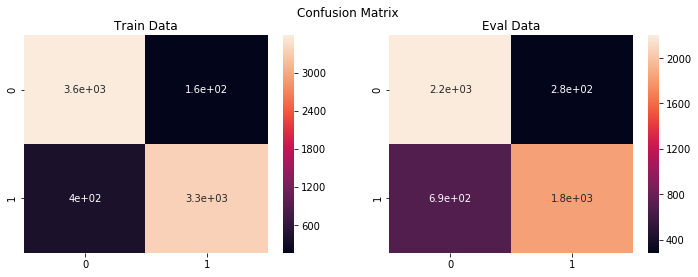

In [32]:
## Display Confusion Matrix - Train Data 
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axs = plt.subplots(1,2)
fig.suptitle('Confusion Matrix')

cf_matrix_train = confusion_matrix(train_data.score, tftrain)
cf_matrix_eval = confusion_matrix(evaluation_data.score, tftest)

axs[0].set_title("Train Data")
axs[1].set_title("Eval Data")

sns.heatmap(cf_matrix_train, annot=True,ax=axs[0])
sns.heatmap(cf_matrix_eval, annot=True,ax=axs[1])